# Tutorial 11: Clustering

__The goal of this assignment is to implement your own version of the k-means algorithm.__

First, you must create 5 intermediate functions to help you divide and implement the algorithm.

At the end of the notebook, the algorithm should achieve a 100% score on the given dataset.

__Grade scale__: 20 points
- __correct function__: 2 points
- __correct given result__: 4 points
- __correct hidden result__: 6 points

__Further documentations__:
* https://learnxinyminutes.com/docs/python/
* https://en.wikipedia.org/wiki/K-means_clustering
* http://stanford.edu/~cpiech/cs221/handouts/kmeans.html

# Core

In [1]:
# to display plots
%matplotlib inline

import math

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets.samples_generator import make_blobs

In [2]:
# generate 100 data points that have 2 features, then divide them into 3 clusters
# we shuffle the point in a deterministic way to have the same version on our computers
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, shuffle=True, random_state=100)

In [3]:
# 5 data points
# col: features
# row: points
X[:5]

array([[  0.33681846,  -3.40287961],
       [ -9.48324266,  -8.66266052],
       [ -1.93336328,   5.70953908],
       [-10.03182406,  -5.57834393],
       [  0.54186078,  -4.37693628]])

In [4]:
# data point labels
# 3 clusters: 0, 1, 2
y

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

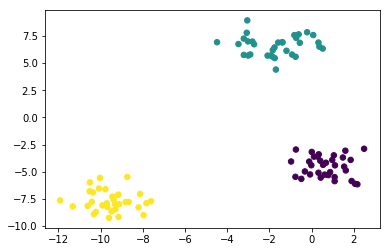

In [5]:
# draw a scatter plot of the points
# X[:, 0]: all points, 1st dimension
# X[:, 1]: all points, 2nd dimension
# c: color of the points (cluster label)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30);

# Example

In [6]:
# we use the k-means implementation of sklearn
# to demonstrate its usage on our dataset
# here, we create and fit a new model  
model = KMeans(n_clusters=3).fit(X)

# collect the results
labels = model.labels_

labels

array([2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2], dtype=int32)

In [7]:
# compare the resulting labels with the true labels
# the function should give a rand score of 100%
score = adjusted_rand_score(y, labels)
print("Score: {:0.4%}".format(score))

Score: 100.0000%


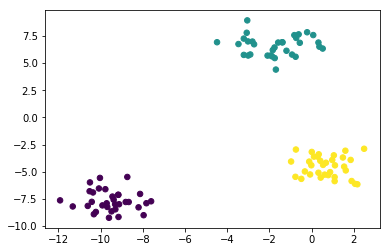

In [8]:
# draw the proposed labels on a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30);

# Functions

In [9]:
def distance(a, b):
    """Compute the euclidean distance between 2 points with n dimensions."""    
    d = 0
    # YOUR CODE HERE
    # raise NotImplementedError()
    for i in range(len(a)):
        d += (a[i]-b[i])**2
    return d**(1/2)

In [10]:
# points with 1 dimension
assert distance([1], [1]) == 0.0
assert distance([0], [9]) == 9.0
assert distance([9], [0]) == 9.0
assert distance([2], [8]) == 6.0
# points with 2 dimensions
assert distance([2, 2], [2, 2]) == 0.0
assert 2.2360 <= distance([3, 6], [2, 8]) <= 2.2361
assert 9.8994 <= distance([1, 2], [8, 9]) <= 9.8995
# points with 3 dimensions
assert distance([3, 3, 3], [3, 3, 3]) == 0.0
assert 10.7703 <= distance([1, 2, 3], [9, 8, 7]) <= 10.7704
assert 1.7320 <= distance([2, 4, 6], [3, 5, 7]) <= 1.7321

In [11]:
def initialize(points, k):
    """Select the k first points as the initial cluster centers."""    
    centers = []
    # YOUR CODE HERE
    # raise NotImplementedError()
    for i in range(k):
        centers.append(points[i])
    return centers

In [12]:
# points with 1 dimension
assert initialize([[0], [1], [2], [3], [4], [5]], 1) == [[0]]
assert initialize([[0], [1], [2], [3], [4], [5]], 2) == [[0], [1]]
assert initialize([[0], [1], [2], [3], [4], [5]], 3) == [[0], [1], [2]]
# points with 2 dimensions
assert initialize([[0, 1], [2, 3], [4, 5]], 1) == [[0, 1]]
assert initialize([[0, 1], [2, 3], [4, 5]], 2) == [[0, 1], [2, 3]]
assert initialize([[0, 1], [2, 3], [4, 5]], 3) == [[0, 1], [2, 3], [4, 5]]
# points with 3 dimensions
assert initialize([[0, 1, 2], [3, 4, 5]], 1) == [[0, 1, 2]]
assert initialize([[0, 1, 2], [3, 4, 5]], 2) == [[0, 1, 2], [3, 4, 5]]

In [13]:
def reassign(points, centers, distance=distance):
    """Assign each point to its closest centers and return the center index.""" 
    labels = []
    dist = []
    # YOUR CODE HERE
    # raise NotImplementedError()
    # initial loop
    for i in range(len(points)):
        dist.append(distance(points[i], centers[0]))
        labels.append(0)
    for j in range(1,len(centers)):
        for i in range(len(points)):
            if distance(points[i], centers[j]) < dist[i]:
                dist[i] = distance(points[i], centers[j])
                labels[i] = j
    return labels

In [14]:
# points with 1 dimension
# left array: points, right array: centers
# the returned value is the index of the center
assert reassign([[1], [3], [7], [9]], [[0], [10]]) == [0, 0, 1, 1]
assert reassign([[1], [3], [7], [9]], [[0], [100]]) == [0, 0, 0, 0]
assert reassign([[1], [3], [7], [9]], [[100], [0]]) == [1, 1, 1, 1]
# points with 2 dimensions
assert reassign([[1, 1], [9, 9]], [[0, 0], [10, 10]]) == [0, 1]
assert reassign([[1, 1], [9, 9]], [[10, 10], [0, 0]]) == [1, 0]
assert reassign([[1, 1], [9, 9]], [[10, 10], [100, 100]]) == [0, 0]
# points with 3 dimensions
assert reassign([[1, 2, 3], [7, 8, 9]], [[0, 0, 0], [10, 10, 10]]) == [0, 1]
assert reassign([[6, 7, 8], [7, 8, 9]], [[0, 0, 0], [10, 10, 10]]) == [1, 1]
assert reassign([[1, 2, 3], [7, 8, 9]], [[0, 0, 0], [10, 100, 0]]) == [0, 0]

In [15]:
def recompute(points, labels):
    """Compute the coordinates of each center based their labels."""
    centers = []
    clusters = []
    # YOUR CODE HERE
    # raise NotImplementedError()
    # initialize centers and clusters
    for i in labels:
        while len(centers) < i+1:
            element = list()
            for _ in range(len(points[0])):
                element.append(0)
            centers.append(element)
            clusters.append(0)
    # adding values to clusters, and calculating number of element for each cluster
    for i in range(len(labels)):
        clusters[labels[i]]+=1
        for j in range(len(points[i])):
            centers[labels[i]][j]+=points[i][j]
    # calculating mean from sums
    for i in range(len(clusters)):
        for j in range(len(centers[i])):
            centers[i][j] = centers[i][j]/clusters[i]
    return centers

In [16]:
# with 1 dimension
# return the center coordinates from their labels
# think of it as the opposite of the reassign function
assert recompute([[0], [2], [4], [6], [8], [10]], [0, 0, 0, 0, 0, 0]) == [[5.0]]
assert recompute([[0], [2], [4], [6], [8], [10]], [0, 0, 0, 0, 1, 1]) == [[3.0], [9.0]]
assert recompute([[0], [2], [4], [6], [8], [10]], [1, 0, 0, 0, 0, 1]) == [[5.0], [5.0]]
assert recompute([[0], [2], [4], [6], [8], [10]], [0, 0, 0, 0, 0, 1]) == [[4.0], [10.0]]
assert recompute([[0], [2], [4], [6], [8], [10]], [2, 1, 0, 0, 1, 2]) == [[5.0], [5.0], [5.0]]
# with 2 dimensions
assert recompute([[2, 2], [4, 4], [6, 6], [8, 8]], [0, 1, 2, 3]) == [[2, 2], [4, 4], [6, 6], [8, 8]]
assert recompute([[2, 2], [4, 4], [6, 6], [8, 8]], [0, 1, 1, 0]) == [[5.0, 5.0], [5.0, 5.0]]
assert recompute([[2, 2], [4, 4], [6, 6], [8, 8]], [1, 1, 0, 0]) == [[7.0, 7.0], [3.0, 3.0]]
# with 3 dimensions
assert recompute([[0, 2, 4], [4, 6, 8], [1, 3, 5], [5, 7, 9]], [0, 0, 0, 0]) == [[2.5, 4.5, 6.5]]
assert recompute([[0, 2, 4], [4, 6, 8], [1, 3, 5], [5, 7, 9]], [0, 0, 1, 1]) == [[2.0, 4.0, 6.0], [3.0, 5.0, 7.0]]
assert recompute([[0, 2, 4], [4, 6, 8], [1, 3, 5], [5, 7, 9]], [1, 0, 1, 0]) == [[4.5, 6.5, 8.5], [0.5, 2.5, 4.5]]

In [17]:
def converged(current, proposed):
    """Test that current and proposed centers have converged."""
    # YOUR CODE HERE
    # raise NotImplementedError()
    if len(current) != len(proposed):
        return False
    for i in range(len(current)):
        for j in range(len(current[i])):
            if current[i][j] != proposed[i][j]:
                return False
    return True

In [18]:
# with 1 dimension
assert converged([[0]], [[0]]) == True
assert converged([[1]], [[1]]) == True
assert converged([[1]], [[0]]) == False
assert converged([[0]], [[1]]) == False
assert converged([[0], [0]], [[0], [0]]) == True
assert converged([[1], [0]], [[0], [1]]) == False
assert converged([[0], [0]], [[0], [1]]) == False
assert converged([[1], [0]], [[0], [0]]) == False
# with 2 dimensions
assert converged([[0, 0], [1, 1]], [[0, 0]]) == False
assert converged([[0, 0], [1, 1]], [[0, 0], [1, 1]]) == True
assert converged([[0, 0], [1, 1]], [[1, 1], [0, 0]]) == False
assert converged([[0, 0], [1, 1]], [[2, 2], [1, 1]]) == False
# with 3 dimensions
assert converged([[1, 2, 3], [4, 5, 6]], [[1, 2, 3]]) == False
assert converged([[1, 2, 3]], [[1, 2, 3], [4, 5, 6]]) == False
assert converged([[1, 2, 3], [0, 0, 0]], [[1, 2, 3], [0, 0 ,0]]) == True
assert converged([[1, 2, 3], [0, 0, 0]], [[0, 0, 0], [1, 2 ,3]]) == False

# Algorithm

In [19]:
def kmeans(points, k, distance=distance):
    """Cluster points into k clusters based on distance."""
    # YOUR CODE HERE
    # raise NotImplementedError()
    # init
    current = initialize(points, k)
    proposed = recompute(points, reassign(points, current))
    n_it = 0
    while (not converged(current, proposed)) and n_it<10000000:
        current = proposed
        proposed = recompute(points, reassign(points, current))
        n_it += 1
        
    return reassign(points, current)

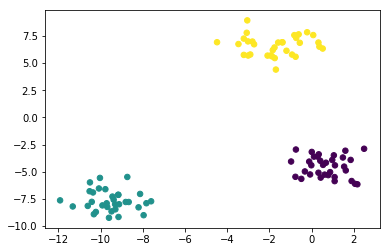

In [20]:
labels = kmeans(X.tolist(), 3)

# cluster points should have the same color
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
assert adjusted_rand_score(labels, y) == 1.0

In [21]:
# DO NOT REMOVE THIS CELL

In [22]:
# DO NOT REMOVE THIS CELL